# Classificação de Áreas de Varzeas e Igapó

### Carregando as bibliotecas

In [3]:
import cv2
import numpy as np
import csv
from time import time
import matplotlib.pyplot as plt
import os

### Lendo as bandas da imagem de satélite

#### Listar todos os arquivos da pasta alvo

In [5]:
ano_alvo = 1996
diretorio_alvo = 'CHEIA/Ano'+str(ano_alvo)
os.chmod(diretorio_alvo, 777)
files = []
# r=root, d=directories, f = files
for r, d, f in os.walk(diretorio_alvo):
    for file in f:
        if '.TIF' in file:
            files.append(os.path.join(r, file))
files

['CHEIA/Ano1996\\29.06.1996\\LT05_L1TP_228061_19960629_20170104_01_T1_B1.TIF',
 'CHEIA/Ano1996\\29.06.1996\\LT05_L1TP_228061_19960629_20170104_01_T1_B2.TIF',
 'CHEIA/Ano1996\\29.06.1996\\LT05_L1TP_228061_19960629_20170104_01_T1_B3.TIF',
 'CHEIA/Ano1996\\29.06.1996\\LT05_L1TP_228061_19960629_20170104_01_T1_B4.TIF',
 'CHEIA/Ano1996\\29.06.1996\\LT05_L1TP_228061_19960629_20170104_01_T1_B5.TIF',
 'CHEIA/Ano1996\\29.06.1996\\LT05_L1TP_228061_19960629_20170104_01_T1_B6.TIF',
 'CHEIA/Ano1996\\29.06.1996\\LT05_L1TP_228061_19960629_20170104_01_T1_B7.TIF',
 'CHEIA/Ano1996\\29.06.1996\\LT05_L1TP_228061_19960629_20170104_01_T1_BQA.TIF']

### Lendo as imagens das bandas automaticamente

In [6]:
bandas = []

for f in files:
    bandas.append(cv2.imread(f, cv2.IMREAD_GRAYSCALE));

### Plotando as imagens

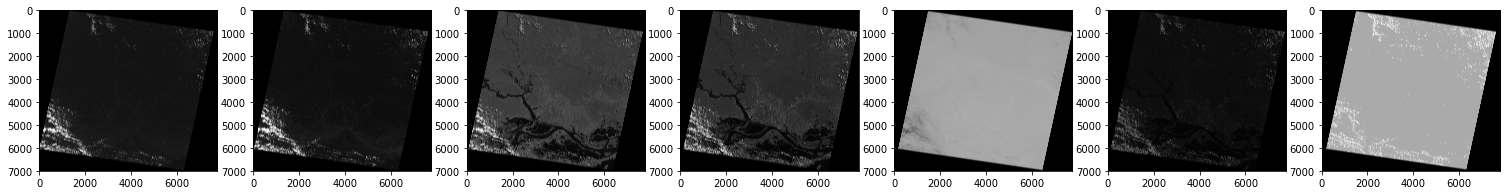

In [8]:
fig=plt.figure(figsize=(30, 20))
columns = len(bandas)
rows = 1
for i in range(1, columns*rows ):
    fig.add_subplot(rows, columns, i)
    plt.imshow(bandas[i], cmap = 'gray', interpolation = 'bicubic')
plt.show()

### Varrer as imagens e ler os pixels

In [9]:
print(bandas[0].shape)
num_linha = bandas[0].shape[0]
num_coluna = bandas[0].shape[1]
entrada_final = []
for linha in range(num_linha):
    for coluna in range(num_coluna):
        entradas = []
        for banda in bandas:
            entradas.append(banda[linha,coluna])  
        entradas.append(linha);entradas.append(coluna)
        entrada_final.append(entradas)

(7001, 7771)


MemoryError: 

### Salvar em arquivo CSV

In [ ]:
resultFyle = open(diretorio_alvo+"/"+str(ano_alvo)+".csv",'w')

for linha in entrada_final:
    for coluna in range(len(linha)-1):
        resultFyle.write(str(linha[coluna]) + ";")
    resultFyle.write(str(linha[len(linha)-1]) + "\n")
    
resultFyle.close()